In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[1.00e+00 5.10e+00 3.50e+00 1.40e+00 2.00e-01]
 [2.00e+00 4.90e+00 3.00e+00 1.40e+00 2.00e-01]
 [3.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [4.00e+00 4.60e+00 3.10e+00 1.50e+00 2.00e-01]
 [5.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [6.00e+00 5.40e+00 3.90e+00 1.70e+00 4.00e-01]
 [7.00e+00 4.60e+00 3.40e+00 1.40e+00 3.00e-01]
 [8.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [9.00e+00 4.40e+00 2.90e+00 1.40e+00 2.00e-01]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [1.20e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [1.40e+01 4.30e+00 3.00e+00 1.10e+00 1.00e-01]
 [1.50e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01]
 [1.60e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.80e+01 5.10e+00 3.50e+00 1.40e+00 3.00e-01]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [2.00e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [2.10e+01 5.40e+00 3.40e+00 1.70e+00 2.

In [4]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def Kmeans(X, k, max_iters = 100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)


        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

In [10]:
k = 3
labels_kmeans, centroids = Kmeans(X, k)

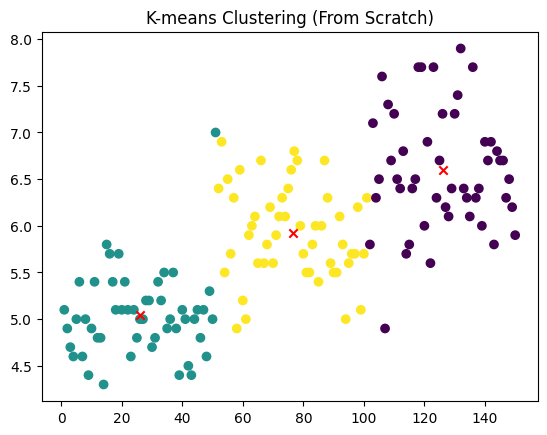

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')  
plt.title("K-means Clustering (From Scratch)")
plt.show()

In [12]:
from scipy.stats import multivariate_normal

In [13]:
import numpy as np
from scipy.stats import multivariate_normal

def em_gmm(X, k, max_iters=100, reg_cov=1e-6):
    n, d = X.shape
    
    
    means = X[np.random.choice(n, k, replace=False)]
    covariances = [np.eye(d) for _ in range(k)]
    mixing_coeffs = np.ones(k) / k
    
    for _ in range(max_iters):
        
        responsibilities = np.zeros((n, k))
        for i in range(k):
            
            cov = covariances[i] + reg_cov * np.eye(d)
            responsibilities[:, i] = mixing_coeffs[i] * multivariate_normal.pdf(X, mean=means[i], cov=cov)
        
        
        responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)
        responsibilities_sum[responsibilities_sum == 0] = 1e-6  
        responsibilities /= responsibilities_sum
        
        
        Nk = responsibilities.sum(axis=0)
        means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
        for i in range(k):
            diff = X - means[i]
            covariances[i] = np.dot(responsibilities[:, i] * diff.T, diff) / Nk[i]
            
            covariances[i] += reg_cov * np.eye(d)
        mixing_coeffs = Nk / n
    
   
    labels = np.argmax(responsibilities, axis=1)
    return labels, means, covariances

In [14]:
k = 3
labels_gmm, means, covariances = em_gmm(X, k)

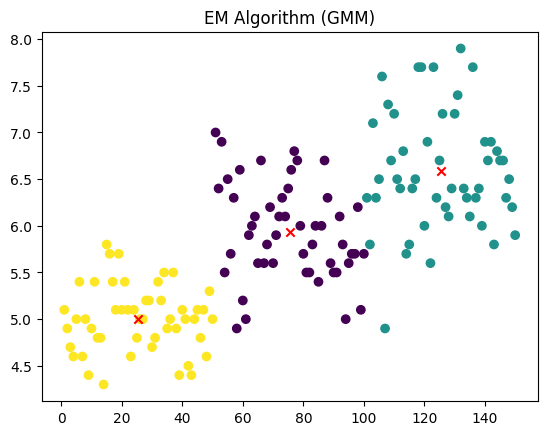

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x')  
plt.title("EM Algorithm (GMM)")
plt.show()


In [18]:
from sklearn.metrics import silhouette_score


kmeans_silhouette = silhouette_score(X, labels_kmeans)


gmm_silhouette = silhouette_score(X, labels_gmm)

print("K-means Silhouette Score:", kmeans_silhouette)

print("GMM Silhouette Score:", gmm_silhouette)


K-means Silhouette Score: 0.5815388282262188
GMM Silhouette Score: 0.5821934246576435
